# Importing Necessary library

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud


# Reading the Datset

In [3]:
df=pd.read_csv('/kaggle/input/resume-dataset/Resume/Resume.csv')

# Explore the Dataset

In [4]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
df.tail()

,ID,Resume_str,Resume_html,Category
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2483,37473139,STOREKEEPER II Professional Sum...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [6]:
# Dropping the column we are not gonna use
df.drop(columns = ['ID', 'Resume_html'], inplace = True)
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [8]:
df.isnull().any().any()

False

In [9]:
df.describe()

,Resume_str,Category
count,2484,2484
unique,2482,24
top,STOREKEEPER II Professional Sum...,INFORMATION-TECHNOLOGY
freq,2,120


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


# Unique Categories

In [11]:
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

# Ploting the Dataset

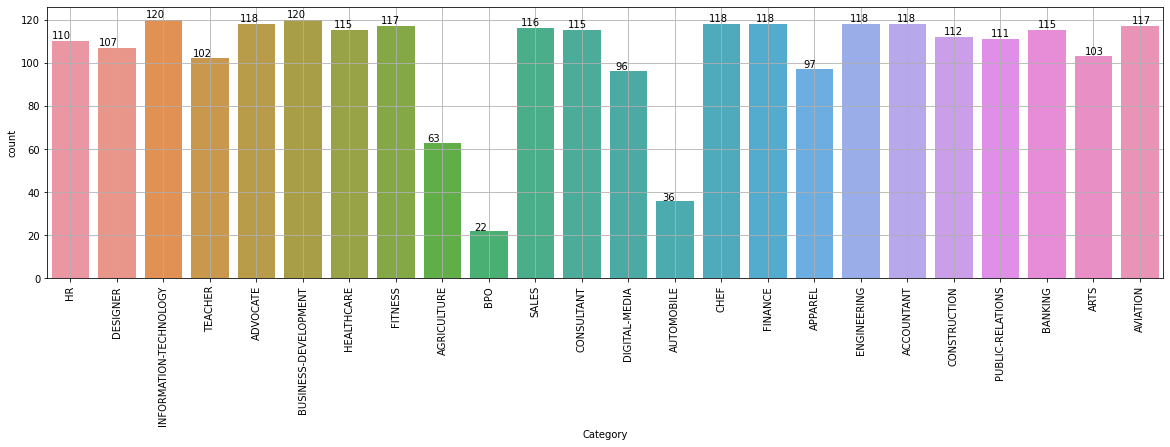

In [18]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

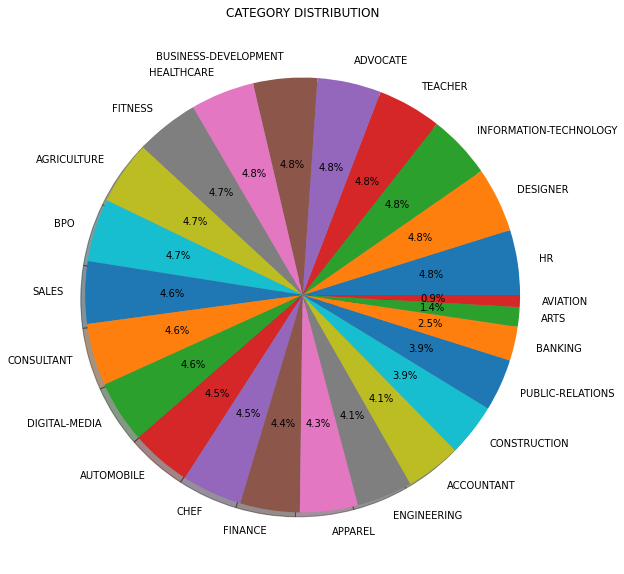

In [15]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

# Data Preprocessing

In [21]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df['Resume_str'] = df.Resume_str.apply(lambda x: cleanResume(x))

In [22]:
df.head()

,Resume_str,Category
0,HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMIN...,HR
1,HR SPECIALIST US HR OPERATIONS Summary Versat...,HR
2,HR DIRECTOR Summary Over 20 years experience ...,HR
3,HR SPECIALIST Summary Dedicated Driven and Dy...,HR
4,HR MANAGER Skill Highlights HR SKILLS HR Depa...,HR


In [24]:
new_df=df.copy()

In [26]:
# most commonly used words

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume_str'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('State', 15351), ('City', 14960), ('Company', 11932), ('Name', 11653), ('A', 7200), ('management', 7011), ('customer', 6156), ('sales', 5645), ('new', 5518), ('Management', 5085), ('team', 4728), ('I', 4710), ('business', 4462), ('service', 4427), ('skills', 4188), ('including', 4003), ('development', 3845), ('training', 3798), ('work', 3514), ('Skills', 3491), ('staff', 3406), ('customers', 3356), ('Education', 3355), ('Manager', 3288), ('company', 3273), ('support', 3223), ('Business', 3183), ('University', 3157), ('financial', 3084), ('project', 3044), ('clients', 3014), ('Experience', 2876), ('data', 2867), ('reports', 2855), ('marketing', 2836), ('ounting', 2829), ('Microsoft', 2811), ('01', 2793), ('2014', 2792), ('ounts', 2769), ('process', 2733), ('experience', 2731), ('client', 2694), ('system', 2669), ('information', 2631), ('2013', 2554), ('quality', 2537), ('systems', 2477), ('Office', 2459), ('procedures', 2415)]


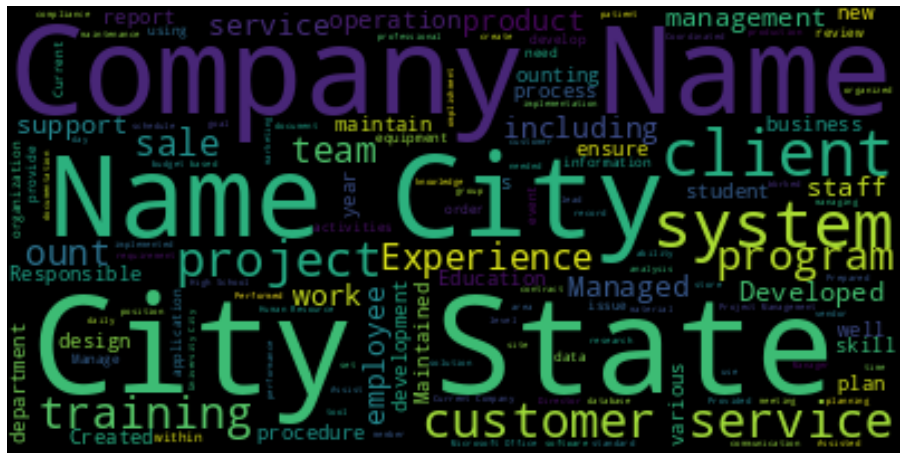

In [27]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(16,16))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [29]:
df.head()

,Resume_str,Category
0,HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMIN...,19
1,HR SPECIALIST US HR OPERATIONS Summary Versat...,19
2,HR DIRECTOR Summary Over 20 years experience ...,19
3,HR SPECIALIST Summary Dedicated Driven and Dy...,19
4,HR MANAGER Skill Highlights HR SKILLS HR Depa...,19


In [30]:
df.Category.value_counts()

20    120
9     120
16    118
1     118
0     118
15    118
10    118
6     117
17    117
22    116
7     115
18    115
12    115
11    112
21    111
19    110
13    107
4     103
23    102
3      97
14     96
2      63
5      36
8      22
Name: Category, dtype: int64

In [34]:
# understanding decode LabelEncoder
new_df.Category.value_counts() 

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

In [35]:
del new_df

# Fit Transform

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [39]:
requiredText = df['Resume_str'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)



# Train Test split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=1, test_size=0.2,shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(1987, 39996)
(497, 39996)


# Training the model

In [41]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = OneVsRestClassifier(RandomForestClassifier())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

# Testing

In [43]:
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set:     0.64


# Performance Evaluation

In [49]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

print("model report: %s: \n %s\n" % (clf, metrics.classification_report(y_test, prediction)))

model report: OneVsRestClassifier(estimator=RandomForestClassifier()): 
               precision    recall  f1-score   support

           0       0.62      0.96      0.75        24
           1       0.57      0.54      0.55        24
           2       0.80      0.31      0.44        13
           3       0.82      0.47      0.60        19
           4       0.75      0.14      0.24        21
           5       0.00      0.00      0.00         7
           6       0.84      0.67      0.74        24
           7       0.57      0.70      0.63        23
           8       0.00      0.00      0.00         4
           9       0.53      0.38      0.44        24
          10       0.76      0.92      0.83        24
          11       0.69      0.82      0.75        22
          12       0.40      0.09      0.14        23
          13       0.71      0.95      0.82        21
          14       0.79      0.79      0.79        19
          15       0.59      0.71      0.64        24
        

In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0 13  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  5  2  0  0  0  1]
 [ 0  2  4  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  3  0  0  1  1  0]
 [ 1  1  0  9  1  0  0  0  0  0  0  1  0  1  1  1  0  0  0  0  1  0  1  1]
 [ 0  2  0  0  3  0  1  0  0  0  1  0  0  1  0  0  0  0  0  0  0  2  1 10]
 [ 1  0  0  1  0  0  0  1  0  0  0  1  0  0  0  1  0  0  0  0  2  0  0  0]
 [ 1  0  0  0  0  0 16  0  0  0  0  0  0  1  0  5  0  0  0  0  1  0  0  0]
 [ 1  1  0  0  0  0  0 16  0  0  0  0  1  0  0  1  0  0  0  0  1  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  2  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  9  0  0  0  1  0  3  0  0  0  2  1  2  1  1]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  1  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  2  0  0  0  0  0  2]
 [ 1  0  1  0  0  0  0  1  0  0  1  1  2  0  1  0  1  0  3  4  6  1  0  0]
 [ 0  1  0  0  0  0  0  0

# Saving the model file

In [45]:
from joblib import Parallel, delayed
import joblib

joblib.dump(clf, 'RandomForest.pkl')


['RandomForest.pkl']

# Inference

In [65]:
# Load the model from the file
model = joblib.load('/kaggle/working/RandomForest.pkl')

# Use the loaded model to make predictions
model.predict(X_test)

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set:     0.62


# Infer with class name

In [46]:
from sklearn.preprocessing import LabelEncoder

class_labels = ["ACCOUNTANT", "ADVOCATE", "AGRICULTURE", "APPAREL", "ARTS", "AUTOMOBILE", "AVIATION", "BANKING", "BPO", "BUSINESS-DEVELOPMENT", "CHEF", "CONSTRUCTION", "CONSULTANT", "DESIGNER", "DIGITAL-MEDIA", "ENGINEERING", "FINANCE", "FITNESS", "HEALTHCARE", "HR", "INFORMATION-TECHNOLOGY", "PUBLIC-RELATIONS", "SALES", "TEACHER"]
# Instantiate and fit a LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(class_labels)

# Load the model from the file
model = joblib.load('/kaggle/working/RandomForest.pkl')

# Use the loaded model to make predictions
predicted_labels_encoded  = model.predict(X_test)

# Map integer labels back to original class names
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

print("Predicted labels:", predicted_labels)

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set:     0.64
Predicted labels: ['CHEF' 'TEACHER' 'AGRICULTURE' 'ADVOCATE' 'FITNESS' 'ACCOUNTANT' 'SALES'
 'ACCOUNTANT' 'TEACHER' 'DIGITAL-MEDIA' 'DESIGNER'
 'INFORMATION-TECHNOLOGY' 'HR' 'SALES' 'DIGITAL-MEDIA' 'CHEF' 'APPAREL'
 'HR' 'PUBLIC-RELATIONS' 'DESIGNER' 'INFORMATION-TECHNOLOGY'
 'PUBLIC-RELATIONS' 'HEALTHCARE' 'FITNESS' 'INFORMATION-TECHNOLOGY'
 'ENGINEERING' 'ADVOCATE' 'ENGINEERING' 'HEALTHCARE' 'TEACHER'
 'DIGITAL-MEDIA' 'INFORMATION-TECHNOLOGY' 'BANKING' 'ACCOUNTANT'
 'ADVOCATE' 'PUBLIC-RELATIONS' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'HR'
 'CHEF' 'HR' 'TEACHER' 'BUSINESS-DEVELOPMENT' 'AVIATION'
 'INFORMATION-TECHNOLOGY' 'ENGINEERING' 'ADVOCATE' 'HEALTHCARE' 'DESIGNER'
 'CONSTRUCTION' 'SALES' 'ENGINEERING' 'DESIGNER' 'ADVOCATE' 'FINANCE'
 'BANKING' 'FINANCE' 'FINANCE' 'CONSTRUCTION' 'ENGINEERING' 'AVIATION'
 'INFORMATION-TECHNOLOGY' 'ENGINEERING' 'BANKING' 'HEALTHCARE'
 'INFORM